In [1]:
# !pip install mediapipe

     |████████████████████████████████| 32.7 MB 217 kB/s 


In [1]:
import mediapipe as mp
import cv2
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import joblib

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
filename = 'data.csv'
width=256
height=256
cam=cv2.VideoCapture(1)
cam.set(cv2.CAP_PROP_FPS, 30)

True

In [3]:
def getImages(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

# Creating A Dataset 

In [4]:
# landmarks = ['class']
# index = 0
# for val in range(42):
#     landmarks += ['x{}'.format(index), 'y{}'.format(index), 'z{}'.format(index)]
#     index += 1
# for val in range(33):
#     landmarks += ['x{}'.format(index), 'y{}'.format(index), 'z{}'.format(index), 'v{}'.format(index)]
#     index += 1
# with open(filename, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(landmarks)
# len(landmarks)

# Collecting Data From Images and Webcam

In [5]:
class DetectLandmarks:
    import mediapipe as mp
    def __init__(self, maxHands=2, tol1=.5,modelComplx = 1, tol2=.5, confidence=.5):
        self.hands=mp_hands.Hands(False,maxHands,modelComplx,tol1,tol2)
        self.pose = mp_pose.Pose(static_image_mode=True,model_complexity=modelComplx,enable_segmentation=True,min_detection_confidence=confidence)

    def Add(self,frame, class_name):
        row = self.predict(frame)
        row.insert(0,class_name)

        with open(filename, mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(row)

    def predict(self, frame, show = 0):
        myHands=[]
        handsType=[]
        row = np.zeros(258, dtype=float)
        frameRGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        resultHands = self.hands.process(frameRGB)
        resultPose = self.pose.process(frameRGB)
        
        if resultHands.multi_hand_landmarks != None:

            for hand, handLandmark in zip(resultHands.multi_handedness, resultHands.multi_hand_landmarks):
                # its left prediction is our right hand!!!!!
                if hand.classification[0].label == 'Right':
                    row[63:126] += np.array([[landmark.x, landmark.y, landmark.z] for landmark in handLandmark.landmark]).flatten() # middle 63 columns
                else :
                    row[0:63] += np.array([[landmark.x, landmark.y, landmark.z] for landmark in handLandmark.landmark]).flatten() # first 63 columns
                if show:
                    mp_drawing.draw_landmarks(frameRGB, handLandmark, mp_hands.HAND_CONNECTIONS, 
                        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                    )
            
            # for printing on image
            for hand in resultHands.multi_handedness:
                handType=hand.classification[0].label
                handsType.append(handType)
            for handLandMarks in resultHands.multi_hand_landmarks:
                myHand=[]
                for landMark in handLandMarks.landmark:
                    myHand.append((int(landMark.x*width),int(landMark.y*height)))
                myHands.append(myHand)

        if resultPose.pose_landmarks != None:
            pose = resultPose.pose_landmarks.landmark
            row[126:258] += np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten() # last 132 columns
            if show:
                mp_drawing.draw_landmarks(frameRGB, resultPose.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                )
        
        row = list(row)
        if show:
            plt.imshow(frameRGB)
            plt.show()

        return row
                    
findLandmarks=DetectLandmarks()

In [ ]:
class_name = 'left_up'
while True:
    ignore,  frame = cam.read()
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    if cv2.waitKey(1) & 0xff ==ord('q'):
        break
cam.release()

In [ ]:
class_name = 'left_up'
both_up_imgs = getImages('left_up')
for frame in both_up_imgs:
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    findLandmarks.Add(cv2.flip(frameSmall,1), 'right_up')

In [ ]:
class_name = 'right_up'
while True:
    ignore,  frame = cam.read()
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    if cv2.waitKey(1) & 0xff ==ord('q'):
        break
cam.release()

In [ ]:
class_name = 'right_up'
both_up_imgs = getImages('right_up')
for frame in both_up_imgs:
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    findLandmarks.Add(cv2.flip(frameSmall,1), 'left_up')

In [ ]:
class_name = 'both_up'
while True:
    ignore,  frame = cam.read()
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    if cv2.waitKey(1) & 0xff ==ord('q'):
        break
cam.release()

In [ ]:
class_name = 'both_up'
both_up_imgs = getImages('both_up')
for frame in both_up_imgs:
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)

In [ ]:
class_name = 'both_down'
while True:
    ignore,  frame = cam.read()
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)
    if cv2.waitKey(1) & 0xff ==ord('q'):
        break
cam.release()

In [ ]:
class_name = 'both_down'
both_up_imgs = getImages('both_down')
for frame in both_up_imgs:
    frameSmall=cv2.resize(frame,(width,height))
    findLandmarks.Add(frameSmall, class_name)

# Training Models of Gathered Data

In [25]:
data = pd.read_csv('finalData.csv')

In [26]:
data.shape

(1185, 259)

In [27]:
data.dtypes

class     object
x0       float64
y0       float64
z0       float64
x1       float64
          ...   
v73      float64
x74      float64
y74      float64
z74      float64
v74      float64
Length: 259, dtype: object

In [37]:
X = data.drop('class', axis=1)
y = data['class']
le = LabelEncoder()
le.fit(y)
labels = le.classes_
y = le.transform(y)
X_train , X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, shuffle=True, train_size=0.9)

In [29]:
print(X_train.shape, y_train.shape)

(1066, 258) (1066,)


In [30]:
class NeuralNetwork:
    def __init__(self, model = None):
        if model is None:
            self.model = keras.models.Sequential()
        else:
            self.model = model

    def InputLayer(self, Input):
        self.model.add(keras.layers.Flatten(input_shape=Input))

    def AddLayers(self, n_layers, neurons, activation):
        for i in range(n_layers):
            self.model.add(keras.layers.BatchNormalization())
            self.model.add(keras.layers.Dense(neurons[i], activation=activation[i], kernel_initializer='he_normal'))
        print(self.model.summary())

    def Fit(self,loss, X_train, X_valid, y_train, y_valid, epochs):
        optimizer = keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-8,beta_2=0.999,beta_1=0.9)
        self.model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
        self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid,y_valid), batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
        return self.model
    
    def PredictProba(self, img, show=0):
        img = cv2.resize(img,(width,height))
        X = np.array(findLandmarks.predict(img, show=show)).reshape(1,-1)
        y = self.model.predict(X)
        return y
    
    def PredictLabel(self, img, labels, show=0):
        img = cv2.resize(img,(width,height))
        X = np.array(findLandmarks.predict(img, show=show)).reshape(1,-1)
        y = self.model.predict(X)
        return labels[np.argmax(y)]

In [50]:
Model = NeuralNetwork()
Model.InputLayer([X_train.shape[1]])
Model.AddLayers(5,[2048,1024,512,256,4], ["selu","selu","selu","selu","softmax"])
model = Model.Fit("sparse_categorical_crossentropy", X_train,X_valid,y_train, y_valid,100) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 258)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 258)               1032      
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              530432    
_________________________________________________________________
batch_normalization_6 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

# To Save The Above Model Uncomment The Below Cell

In [32]:
# model.save('model')  
# !zip -r /content/model.zip /content/model

# To Load A Different Model

In [48]:
# model = keras.models.load_model('model')
# Model = NeuralNetwork(model)

# For Testing Model On Unseen Images

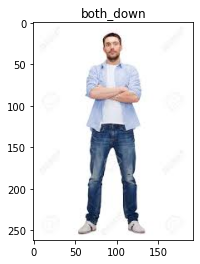

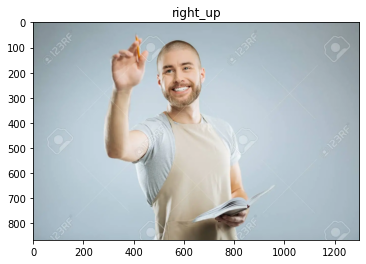

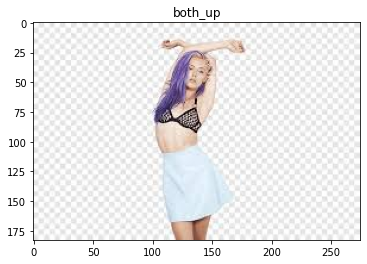

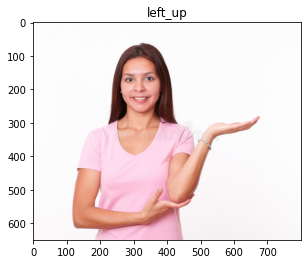

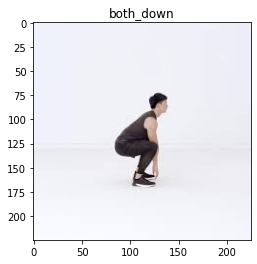

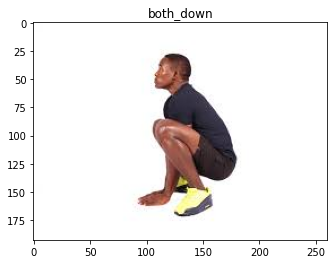

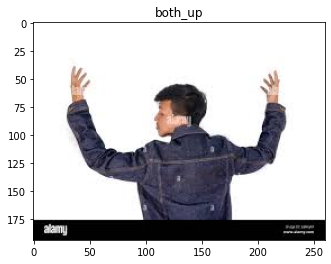

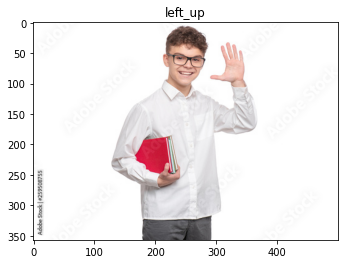

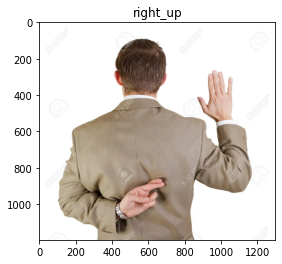

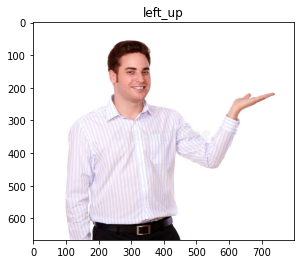

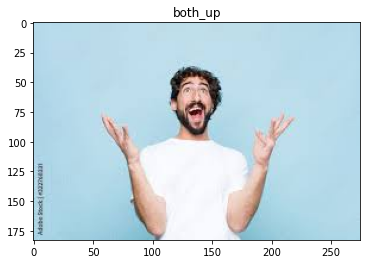

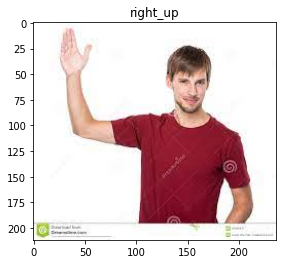

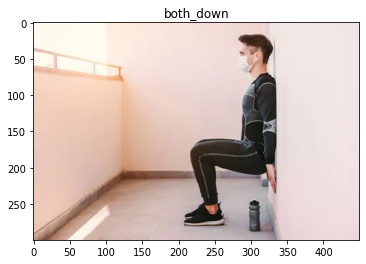

In [52]:
testImgs = getImages('test_imgs')
for img in testImgs:
    label = Model.PredictLabel(img,labels)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.title(label)
    plt.imshow(img)
    plt.show()
    # print(label)

# For Getting RealTime Predictions

In [29]:
# cam=cv2.VideoCapture(1)
# cam.set(cv2.CAP_PROP_FPS, 30)
# while True:
#     ignore,  frame = cam.read()
#     y = nmodel.Predict(frame)
#     label = labels[np.argmax(y)]
#     cv2.putText(frame, label, (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv2.LINE_AA, False)
#     cv2.imshow('predcition', frame)
#     if cv2.waitKey(1) & 0xff ==ord('q'):
#         break
# cam.release()